In [2]:
from keras.datasets import fashion_mnist
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

In [4]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
data_max = np.max(train_X)
train_X = train_X.astype('float32') / data_max
test_X = test_X.astype('float32') / data_max
np.max(train_X)

1.0

In [6]:
num_classes = np.max(train_y) + 1
train_y = utils.to_categorical(train_y, num_classes)
test_y = utils.to_categorical(test_y, num_classes)

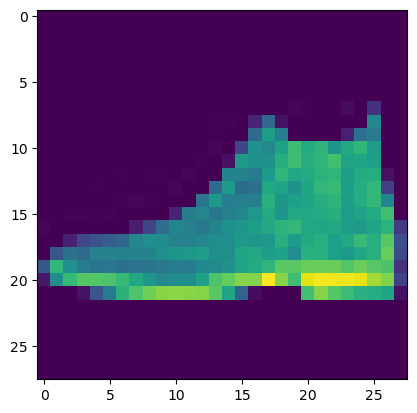

In [7]:
plt.imshow(test_X[0,...])

In [8]:
#train_X = train_X.reshape(train_X.shape[0], 28, 28, 1).astype('float32')
#test_X = test_X.reshape(test_X.shape[0], 28, 28, 1).astype('float32')

In [9]:
model =  Sequential()
#model.add(preprocessing.RandomFlip("horizontal", input_shape=(28,28,1)))
model.add(layers.Dropout(0.1, input_shape=(28,28)))
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(num_classes, activation="softmax"))
model.summary()

2023-05-21 10:45:05.260030: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0e:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-21 10:45:05.269121: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0e:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-21 10:45:05.269153: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0e:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-21 10:45:05.269463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 28, 28)            0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer=SGD(learning_rate=0.0002, momentum=0.95),metrics=["accuracy"])

In [11]:
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), batch_size = 64, epochs=10)

Epoch 1/10


2023-05-21 10:45:06.493295: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2023-05-21 10:45:06.631916: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


 12/938 [..............................] - ETA: 4s - loss: 2.3851 - accuracy: 0.1836   

2023-05-21 10:45:08.075628: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


932/938 [============================>.] - ETA: 0s - loss: 1.2283 - accuracy: 0.6176

2023-05-21 10:45:12.812024: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.
2023-05-21 10:45:12.845773: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


938/938 [==============================] - 7s 6ms/step - loss: 1.2261 - accuracy: 0.6182 - val_loss: 0.8425 - val_accuracy: 0.7108
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.7603 - accuracy: 0.7453 - val_loss: 0.7002 - val_accuracy: 0.7636
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.6609 - accuracy: 0.7811 - val_loss: 0.6353 - val_accuracy: 0.7841
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.6111 - accuracy: 0.7954 - val_loss: 0.5954 - val_accuracy: 0.7981
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.5778 - accuracy: 0.8063 - val_loss: 0.5698 - val_accuracy: 0.8059
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.5538 - accuracy: 0.8119 - val_loss: 0.5540 - val_accuracy: 0.8092
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.5376 - accuracy: 0.8167 - val_loss: 0.5354 - val_accuracy: 0.8179
Epoch 8/10
938/93

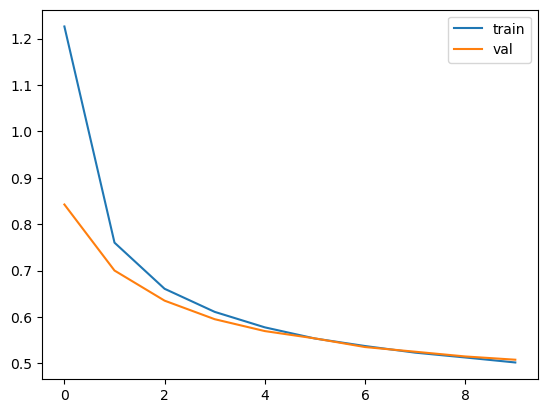

In [12]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.show()

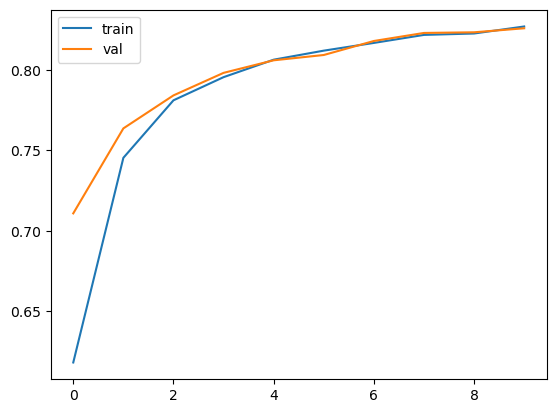

In [13]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()